<a href="https://colab.research.google.com/github/Haila-Abdullah/Project_Predict_Bike_Sharing_Demand_with_AutoGluon/blob/main/Project_Predict_Bike_Sharing_Demand_with_AutoGluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.

 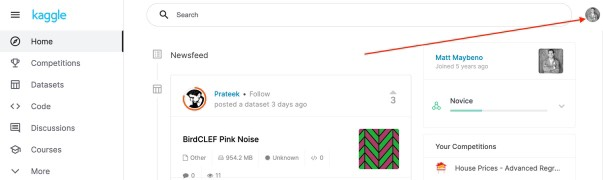
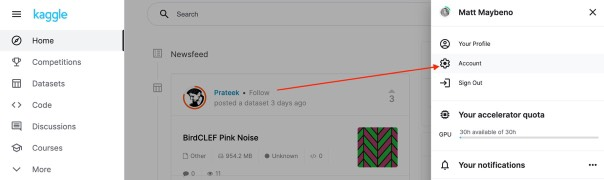
2. Scroll down to API and click Create New API Token.
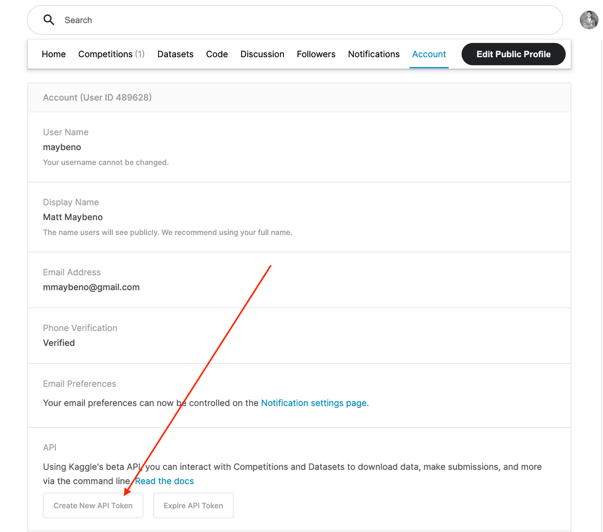
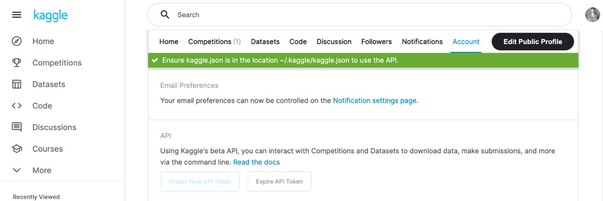
3. Open up `kaggle.json` and use the username and key.
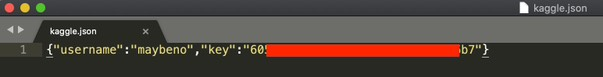

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.6.3 requires bokeh<3.8.0,>=3.5.0, but you have bokeh 2.0.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
holoviews 1.20.2 requires bokeh>=3.1, but you have bokeh 2.0.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 273.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully unins

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "haila23"
kaggle_key = "89b705cbeea09f07dd43a9063a14131f"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
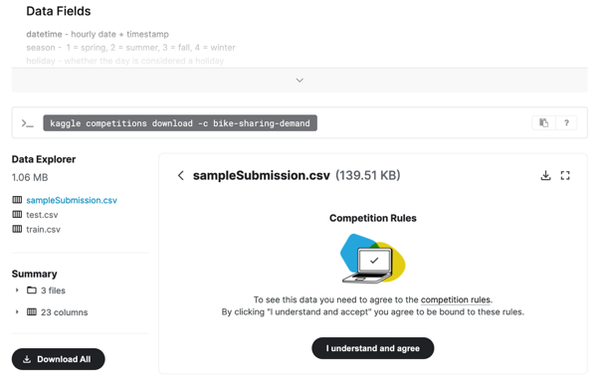

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 295MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("/content/train.csv",parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/content/test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("/content/sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label="count",eval_metric="root_mean_squared_error",
                             learner_kwargs={"ignored_columns":["casual","registered"]}
                             ).fit(train_data=train,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250518_091419"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.39 GB / 12.67 GB (89.9%)
Disk Space Avail:   66.78 GB / 107.72 GB (62.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=2471) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=2680) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=2752) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=2752) [2000]	valid_set's rmse: 126.702
(_ray_fit pid=2752) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=2752) [4000]	valid_set's rmse: 125.904
(_ray_fit pid=2752) [5000]	valid_set's rmse: 125.681 [repeated 2x across cluster]


(_ray_fit pid=2752) 	Ran out of time, early stopping on iteration 6122. Best iteration is:
(_ray_fit pid=2752) 	[6023]	valid_set's rmse: 125.428


(_ray_fit pid=2816) [4000]	valid_set's rmse: 133.013 [repeated 4x across cluster]


(_ray_fit pid=2816) 	Ran out of time, early stopping on iteration 6578. Best iteration is:
(_ray_fit pid=2816) 	[6544]	valid_set's rmse: 132.434


(_ray_fit pid=2962) [1000]	valid_set's rmse: 137.712 [repeated 3x across cluster]
(_ray_fit pid=2962) [4000]	valid_set's rmse: 135.344 [repeated 3x across cluster]
(_ray_fit pid=2962) [6000]	valid_set's rmse: 135.139 [repeated 3x across cluster]


(_ray_fit pid=2962) 	Ran out of time, early stopping on iteration 6099. Best iteration is:
(_ray_fit pid=2962) 	[5950]	valid_set's rmse: 135.077


(_ray_fit pid=3044) [4000]	valid_set's rmse: 138.084 [repeated 3x across cluster]


(_dystack pid=2277) 	-131.9999	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2277) 	105.23s	 = Training   runtime
(_dystack pid=2277) 	15.77s	 = Validation runtime
(_dystack pid=2277) Fitting model: WeightedEnsemble_L2 ... Training model for up to 141.84s of the 18.22s of remaining time.
(_dystack pid=2277) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=2277) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2277) 	0.03s	 = Training   runtime
(_dystack pid=2277) 	0.0s	 = Validation runtime
(_dystack pid=2277) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=2277) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 18.18s of the 18.14s of remaining time.
(_dystack pid=2277) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
(_ray_fit pid=3212) 	Ran out of time, early stopping on iteration 982. Best iteration is:
(_ray_fit 

(_ray_fit pid=3343) [1000]	valid_set's rmse: 78.866 [repeated 2x across cluster]


(_ray_fit pid=3343) 	Ran out of time, early stopping on iteration 1023. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=3343) 	[972]	valid_set's rmse: 78.8315 [repeated 2x across cluster]


(_ray_fit pid=3478) [1000]	valid_set's rmse: 76.3891 [repeated 2x across cluster]


(_ray_fit pid=3478) 	Ran out of time, early stopping on iteration 1065. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=3478) 	[1058]	valid_set's rmse: 76.2231 [repeated 2x across cluster]


(_ray_fit pid=3608) [1000]	valid_set's rmse: 72.4167 [repeated 2x across cluster]


(_ray_fit pid=3608) 	Ran out of time, early stopping on iteration 1018. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=3608) 	[1017]	valid_set's rmse: 72.3677 [repeated 2x across cluster]
(_dystack pid=2277) 	-74.409	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2277) 	58.56s	 = Training   runtime
(_dystack pid=2277) 	3.98s	 = Validation runtime
(_dystack pid=2277) Fitting model: WeightedEnsemble_L3 ... Training model for up to 141.84s of the -48.79s of remaining time.
(_dystack pid=2277) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.96, 'KNeighborsDist_BAG_L1': 0.04}
(_dystack pid=2277) 	-74.4046	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2277) 	0.1s	 = Training   runtime
(_dystack pid=2277) 	0.01s	 = Validation runtime
(_dystack pid=2277) AutoGluon training complete, total runtime = 190.9s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 61.2 rows/s (1210 batch size)
(_dystack pid=2277) TabularPredictor saved. To l

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.leaderboard(extra_info=True, silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,LightGBMXT_BAG_L2,-60.841996,root_mean_squared_error,35.899430,337.395696,7.252561,93.651908,2,True,8,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[KNeighborsDist_BAG_L1, temp, CatBoost_BAG_L1,...",None,"{'learning_rate': 0.05, 'extra_trees': True}",{'num_boost_round': 2040},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[CatBoost_BAG_L1, KNeighborsDist_BAG_L1, Light...",[WeightedEnsemble_L3]
1,WeightedEnsemble_L3,-60.841996,root_mean_squared_error,35.900717,337.447561,0.001287,0.051865,3,True,9,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[LightGBMXT_BAG_L2],None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[CatBoost_BAG_L1, KNeighborsDist_BAG_L1, Light...",[]
2,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.069417,0.053321,0.069417,0.053321,1,True,2,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, weather, datetime.day, datetime.month,...",None,{'weights': 'distance'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[LightGBMXT_BAG_L2, WeightedEnsemble_L3, Weigh..."
3,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.070817,0.092650,0.001400,0.039329,2,True,7,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[KNeighborsDist_BAG_L1],None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[KNeighborsDist_BAG_L1],[]
4,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.069631,0.052276,0.069631,0.052276,1,True,1,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, weather, datetime.day, datetime.month,...",None,{'weights': 'uniform'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[LightGBMXT_BAG_L2, WeightedEnsemble_L3]"
5,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.843231,27.135410,0.843231,27.135410,1,True,5,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, weather, datetime.day, datetime.month,...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[LightGBMXT_BAG_L2, WeightedEnsemble_L3]"
6,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,2.229098,59.996894,2.229098,59.996894,1,True,4,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, weather, datetime.day, datetime.month,...",None,{'learning_rate': 0.05},{'num_boost_round': 1063},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[LightGBMXT_BAG_L2, WeightedEnsemble_L3]"
7,LightGBMXT_BAG_L1,-131.460909,root_mean_squared_error,25.305140,114.470686,25.305140,114.470686,1,True,3,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, weather, datetime.day, datetime.month,...",None,"{'learning_rate': 0.05, 'extra_trees': True}",{'num_boost_round': 3913},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[LightGBMXT_BAG_L2, WeightedEnsemble_L3]"
8,CatBoost_BAG_L1,-135.188349,root_mean_squared_error,0.130352,42.035203,0.130352,42.035203,1,True,6,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, weather, datetime.day, datetime.month,...",None,"{'iterations': 10000, 'learning_rate': 0.05, 

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

,count
0,39.292206
1,47.725536
2,54.062866
3,56.665134
4,58.778149


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,107.127060
std,100.642006
min,-18.179512
25%,16.048372
50%,64.498672
75%,187.519226
max,404.535248


In [ ]:
# How many negative values do we have?
negative_value=(predictions<0).sum()
print(negative_value)

63


In [ ]:
# Set them to zero
predictions[predictions<0]=0

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 198kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-05-18 09:28:31.453000  first raw submission               SubmissionStatus.COMPLETE  1.99863      1.99863       
submission_new_hpo.csv       2025-05-17 23:09:20.323000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.45841      0.45841       
submission_new_features.csv  2025-05-17 22:42:54.187000  new features                       SubmissionStatus.COMPLETE  0.61168      0.61168       
submission.csv               2025-05-17 22:28:51.040000  first raw submission               SubmissionStatus.COMPLETE  1.84137      1.84137       


#### Initial score of 1.99863

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

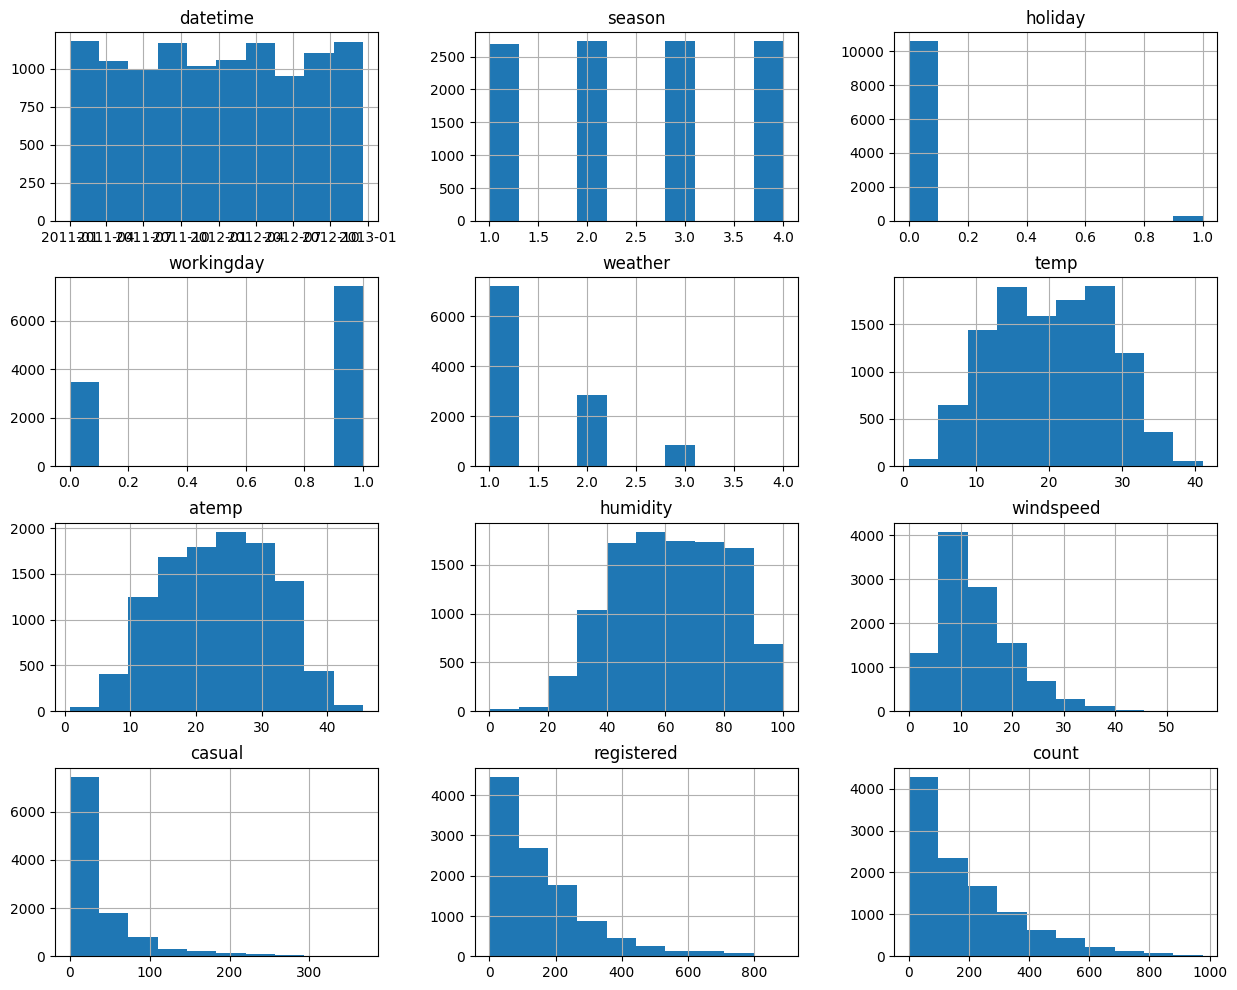

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,12))


In [ ]:
# create a new feature
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

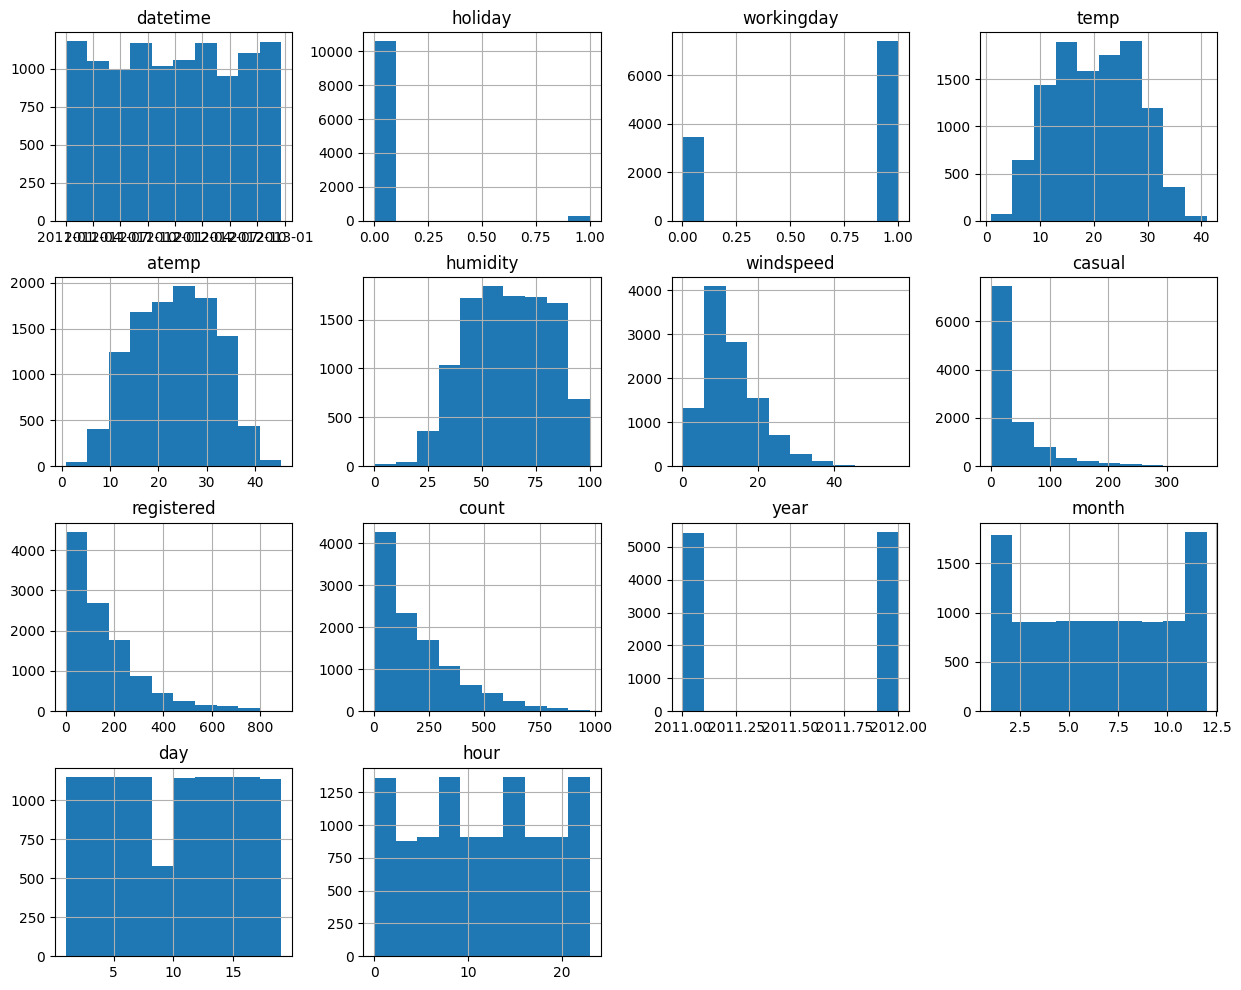

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,12))

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label="count",eval_metric="root_mean_squared_error",
                             learner_kwargs={"ignored_columns":["casual","registered"]}
                             ).fit(train_data=train,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250518_094744"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.07 GB / 12.67 GB (79.5%)
Disk Space Avail:   65.89 GB / 107.72 GB (61.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [ ]:
predictor_new_features.leaderboard(extra_info=True, silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-30.544663,root_mean_squared_error,46.830310,398.247713,0.001258,0.044942,3,True,9,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBMXT_BAG_L2, LightGBMXT_BAG_L1, LightGB...",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 25},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[KNeighborsDist_BAG_L1, LightGBMXT_BAG_L2, Lig...",[]
1,LightGBM_BAG_L2,-30.740778,root_mean_squared_error,44.959145,334.798794,0.644776,67.033863,2,True,8,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[KNeighborsDist_BAG_L1, hour, temp, year, day,...",None,{'learning_rate': 0.05},{'num_boost_round': 332},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[KNeighborsDist_BAG_L1, LightGBMXT_BAG_L1, Lig...",[WeightedEnsemble_L3]
2,LightGBMXT_BAG_L2,-31.424526,root_mean_squared_error,46.184276,331.168909,1.869906,63.403977,2,True,7,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[KNeighborsDist_BAG_L1, hour, temp, year, day,...",None,"{'learning_rate': 0.05, 'extra_trees': True}",{'num_boost_round': 738},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[KNeighborsDist_BAG_L1, LightGBMXT_BAG_L1, Lig...",[WeightedEnsemble_L3]
3,WeightedEnsemble_L2,-32.394652,root_mean_squared_error,44.195331,267.687770,0.001922,0.026137,2,True,6,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L1, LightGBM_BAG_L1, KNei...",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 25},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L1, LightGBM_BAG_L1, KNei...",[]
4,LightGBM_BAG_L1,-33.917339,root_mean_squared_error,5.758785,78.662240,5.758785,78.662240,1,True,4,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, weather, day, month, hour, workingday,...",None,{'learning_rate': 0.05},{'num_boost_round': 2032},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[LightGBMXT_BAG_L2, WeightedEnsemble_L3, Light..."
5,LightGBMXT_BAG_L1,-34.453884,root_mean_squared_error,37.382509,158.918650,37.382509,158.918650,1,True,3,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, weather, day, month, hour, workingday,...",None,"{'learning_rate': 0.05, 'extra_trees': True}",{'num_boost_round': 5933},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[LightGBMXT_BAG_L2, WeightedEnsemble_L3, Light..."
6,RandomForestMSE_BAG_L1,-38.424984,root_mean_squared_error,0.914641,29.992723,0.914641,29.992723,1,True,5,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, weather, day, month, hour, workingday,...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[LightGBMXT_BAG_L2, WeightedEnsemble_L3, Light..."
7,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.137474,0.088021,0.137474,0.088021,1,True,2,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, month, hour, datetime.year, datetime, ...",None,{'weights': 'distance'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[LightGBMXT_BAG_L2, WeightedEnsemble_L3, Light..."
8,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.120960,0.103298,0.120960,0.103298,1,True,1,...,"{'use_orig_features': True, 'valid_stacke

In [ ]:
# Remember to set all negative values to zero
predictions_new_features= predictor_new_features.predict(test)
predictions_new_features[predictions_new_features<0]=0
predictions_new_features= pd.DataFrame(predictions_new_features)
predictions_new_features.head()

,count
0,16.082209
1,10.451468
2,9.819575
3,8.638325
4,7.653365


In [ ]:
# Same submitting predictions
submission_new_features= pd.read_csv("/content/sampleSubmission.csv",parse_dates=["datetime"])
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 318kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-18 10:07:14.030000  new features                       SubmissionStatus.COMPLETE  0.60932      0.60932       
submission.csv               2025-05-18 09:28:31.453000  first raw submission               SubmissionStatus.COMPLETE  1.99863      1.99863       
submission_new_hpo.csv       2025-05-17 23:09:20.323000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.45841      0.45841       
submission_new_features.csv  2025-05-17 22:42:54.187000  new features                       SubmissionStatus.COMPLETE  0.61168      0.61168       


#### New Score of 0.61168

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
from autogluon.common import space

hyperparameters={'NN_TORCH':{'num_layers':space.Int(2,5),
                        'dropout_prob':space.Real(0.1,0.3)
},
'GBM':{'learning_rate':space.Real(1e-4,1e-1,log=True),
       'num_boost_round':space.Int(100,1000),
       'max_depth':space.Int(4,12)
       },
}

hyperparameter_tune_kwargs= {
    'num_trials':3,
    'scheduler':'local',
    'searcher':'random',
    }


predictor_new_hpo = TabularPredictor(label="count",eval_metric="root_mean_squared_error",
                             learner_kwargs={"ignored_columns":["casual","registered"]},
                                     ).fit(train_data=train,time_limit=1800,presets="best_quality",
                                           hyperparameters=hyperparameters,
                                           hyperparameter_tune_kwargs= hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20250518_100729"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       5.70 GB / 12.67 GB (45.0%)
Disk Space Avail:   65.44 GB / 107.72 GB (60.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
Fitted model: LightGBM_BAG_L1/T1 ...
	-180.0576	 = Validation score   (-root_mean_squared_error)
	53.32s	 = Training   runtime
	0.19s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-41.2321	 = Validation score   (-root_mean_squared_error)
	59.32s	 = Training   runtime
	1.18s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-105.5618	 = Validation score   (-root_mean_squared_error)
	62.21s	 = Training   runtime
	0.71s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 409.79s of the 1191.24s of remaining time.


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L1   |
+----------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator   |
| Scheduler                        FIFOScheduler           |
| Number of trials                 3                       |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250518_100729/models/NeuralNetTorch_BAG_L1


2025-05-18 10:24:29,358	INFO timeout.py:54 -- Reached timeout of 409.79320169259313 seconds. Stopping all trials.
2025-05-18 10:24:29,381	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250518_100729/models/NeuralNetTorch_BAG_L1' in 0.0159s.
2025-05-18 10:24:30,769	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 3 trial(s):
- 539fb_00000: FileNotFoundError('Could not fetch metrics for 539fb_00000: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250518_100729/models/NeuralNetTorch_BAG_L1/539fb_00000')
- 539fb_00001: FileNotFoundError('Could not fetch metrics for 539fb_00001: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250518_100729/models/NeuralNetTorch_BAG_L1/539fb_00001')
- 539fb_00002: FileNotFoundError('Could not fetch metrics for 539fb_00002: both result.json and progress.csv were not found at /content/AutogluonModels/ag-

	Ensemble Weights: {'LightGBM_BAG_L1/T2': 0.737, 'NeuralNetTorch_BAG_L1/539fb_00000': 0.263}
	-40.1645	 = Validation score   (-root_mean_squared_error)
	0.12s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting 2 L2 models, fit_strategy="sequential" ...
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 350.41s of the 778.65s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
Fitted model: LightGBM_BAG_L2/T1 ...
	-179.4464	 = Validation score   (-root_mean_squared_error)
	52.91s	 = Training   runtime
	0.23s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-37.1439	 = Validation score   (-root_mean_squared_error)
	60.8s	 = Training   runtime
	0.85s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-87.8848	 = Validation score   (-root_mean_squared_error)
	64.92s	 = Training   runtime
	0.65s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 350.41s of the 599.59s of remaining time.


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L2   |
+----------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator   |
| Scheduler                        FIFOScheduler           |
| Number of trials                 3                       |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250518_100729/models/NeuralNetTorch_BAG_L2


2025-05-18 10:33:20,785	INFO timeout.py:54 -- Reached timeout of 350.40852549076084 seconds. Stopping all trials.
2025-05-18 10:33:20,808	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250518_100729/models/NeuralNetTorch_BAG_L2' in 0.0169s.
2025-05-18 10:33:24,603	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 3 trial(s):
- b3d2d_00000: FileNotFoundError('Could not fetch metrics for b3d2d_00000: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250518_100729/models/NeuralNetTorch_BAG_L2/b3d2d_00000')
- b3d2d_00001: FileNotFoundError('Could not fetch metrics for b3d2d_00001: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250518_100729/models/NeuralNetTorch_BAG_L2/b3d2d_00001')
- b3d2d_00002: FileNotFoundError('Could not fetch metrics for b3d2d_00002: both result.json and progress.csv were not found at /content/AutogluonModels/ag-

In [ ]:
predictor_new_hpo.leaderboard(extra_info=True, silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-36.671354,root_mean_squared_error,4.645170,935.300848,0.001464,0.044734,3,True,10,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBM_BAG_L2/T2, NeuralNetTorch_BAG_L2/b3d...",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 5},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBM_BAG_L1/T2, LightGBM_BAG_L1/T3, Neura...",[]
1,LightGBM_BAG_L2/T2,-37.143879,root_mean_squared_error,3.783527,603.608545,0.854581,60.801998,2,True,7,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[hour, LightGBM_BAG_L1/T1, temp, year, day, at...",None,"{'learning_rate': 0.013981961408994055, 'num_b...",{'num_boost_round': 459},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBM_BAG_L1/T1, LightGBM_BAG_L1/T2, Neura...",[WeightedEnsemble_L3]
2,NeuralNetTorch_BAG_L2/b3d2d_00000,-37.758078,root_mean_squared_error,3.789125,874.454116,0.860180,331.647569,2,True,9,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[hour, LightGBM_BAG_L1/T1, temp, year, day, at...",None,"{'num_epochs': 1000, 'epochs_wo_improve': None...","{'batch_size': 64, 'num_epochs': 48}","{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBM_BAG_L1/T1, LightGBM_BAG_L1/T2, Neura...",[WeightedEnsemble_L3]
3,WeightedEnsemble_L2,-40.164457,root_mean_squared_error,2.034642,427.396718,0.005468,0.121246,2,True,5,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[NeuralNetTorch_BAG_L1/539fb_00000, LightGBM_B...",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 19},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[NeuralNetTorch_BAG_L1/539fb_00000, LightGBM_B...",[]
4,LightGBM_BAG_L1/T2,-41.232125,root_mean_squared_error,1.176947,59.321047,1.176947,59.321047,1,True,2,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, weather, day, month, hour, workingday,...",None,"{'learning_rate': 0.013981961408994055, 'num_b...",{'num_boost_round': 459},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[LightGBM_BAG_L2/T3, WeightedEnsemble_L3, Ligh..."
5,NeuralNetTorch_BAG_L1/539fb_00000,-47.952206,root_mean_squared_error,0.852227,367.954424,0.852227,367.954424,1,True,4,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, weather, day, month, hour, workingday,...",None,"{'num_epochs': 1000, 'epochs_wo_improve': None...","{'batch_size': 64, 'num_epochs': 62}","{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[LightGBM_BAG_L2/T3, WeightedEnsemble_L3, Ligh..."
6,LightGBM_BAG_L2/T3,-87.884847,root_mean_squared_error,3.581860,607.723372,0.652914,64.916825,2,True,8,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[hour, LightGBM_BAG_L1/T1, temp, year, day, at...",None,"{'learning_rate': 0.001422804145489076, 'num_b...",{'num_boost_round': 572},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBM_BAG_L1/T1, LightGBM_BAG_L1/T2, Neura...",[]
7,LightGBM_BAG_L1/T3,-105.561793,root_mean_squared_error,0.714036,62.209630,0.714036,62.209630,1,True,3,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[atemp, weather, day, month, hour, workingday,...",None,"{'learning_rate': 0.001422804145489076, 'num_b...",{'num_boost_round': 572},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[LightGBM_BAG_L2/T3, Weight

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo= predictor_new_hpo.predict(test)
predictions_new_hpo[predictions_new_hpo<0]=0
predictions_new_hpo= pd.DataFrame(predictions_new_hpo)
predictions_new_hpo.head()

,count
0,9.903288
1,6.251307
2,5.044180
3,4.191925
4,4.098624


In [ ]:
# Same submitting predictions
submission_new_hpo= pd.read_csv("/content/sampleSubmission.csv",parse_dates=['datetime'])
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 197kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-05-18 10:55:01.467000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.45804      0.45804       
submission_new_features.csv  2025-05-18 10:07:14.030000  new features                       SubmissionStatus.COMPLETE  0.60932      0.60932       
submission.csv               2025-05-18 09:28:31.453000  first raw submission               SubmissionStatus.COMPLETE  1.99863      1.99863       
submission_new_hpo.csv       2025-05-17 23:09:20.323000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.45841      0.45841       


#### New Score of 0.45804  

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

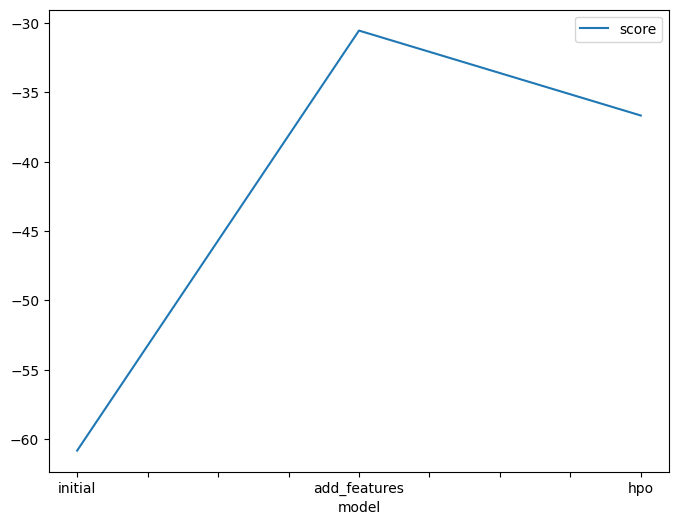

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-60.841996, -30.544663, -36.671354 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

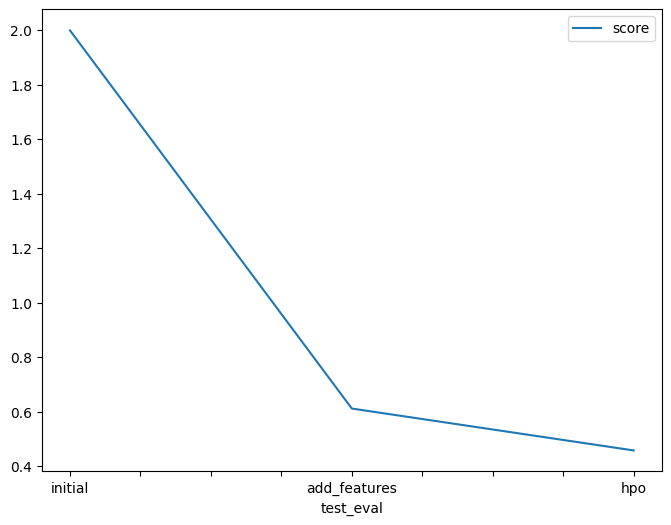

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.99863 , 0.61168, 0.45804 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['defualt', 'defualt', "num_layers:space.Int(2,5)"],
    "hpo2": ['defualt', 'defualt', "'dropout_prob:space.Real(0.1,0.3)"],
    "hpo3": ['defualt', 'defualt', "learning_rate:space.Real(1e-4,1e-1,log=True)"],
    "score": [1.99863 , 0.61168, 0.45804 ]
})

,model,hpo1,hpo2,hpo3,score
0,initial,defualt,defualt,defualt,1.99863
1,add_features,defualt,defualt,defualt,0.61168
2,hpo,"num_layers:space.Int(2,5)","'dropout_prob:space.Real(0.1,0.3)","learning_rate:space.Real(1e-4,1e-1,log=True)",0.45804
